# Explore here

In [1]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Models
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Get data
df = pd.read_csv("../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv")

# Configure pandas to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Initial Data Display
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# DataFrame Dimensions
df.shape

(253680, 22)

In [4]:
# Basic Information on Data Types and Non-Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
# Search and Removal of Duplicate Data
duplicates = df.duplicated().sum()
duplicates

np.int64(24206)

In [6]:
# Dop duplicates
df = df.drop_duplicates()

In [13]:
count = df["Diabetes_binary"].value_counts()
count

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

In [16]:
print("Porcentaje clases variable objetivo:")
print(f"Clase 1: {100*count[1]/count.sum():.2f}%")
print(f"Clase 0: {100*count[0]/count.sum():.2f}%")

Porcentaje clases variable objetivo:
Clase 1: 15.29%
Clase 0: 84.71%


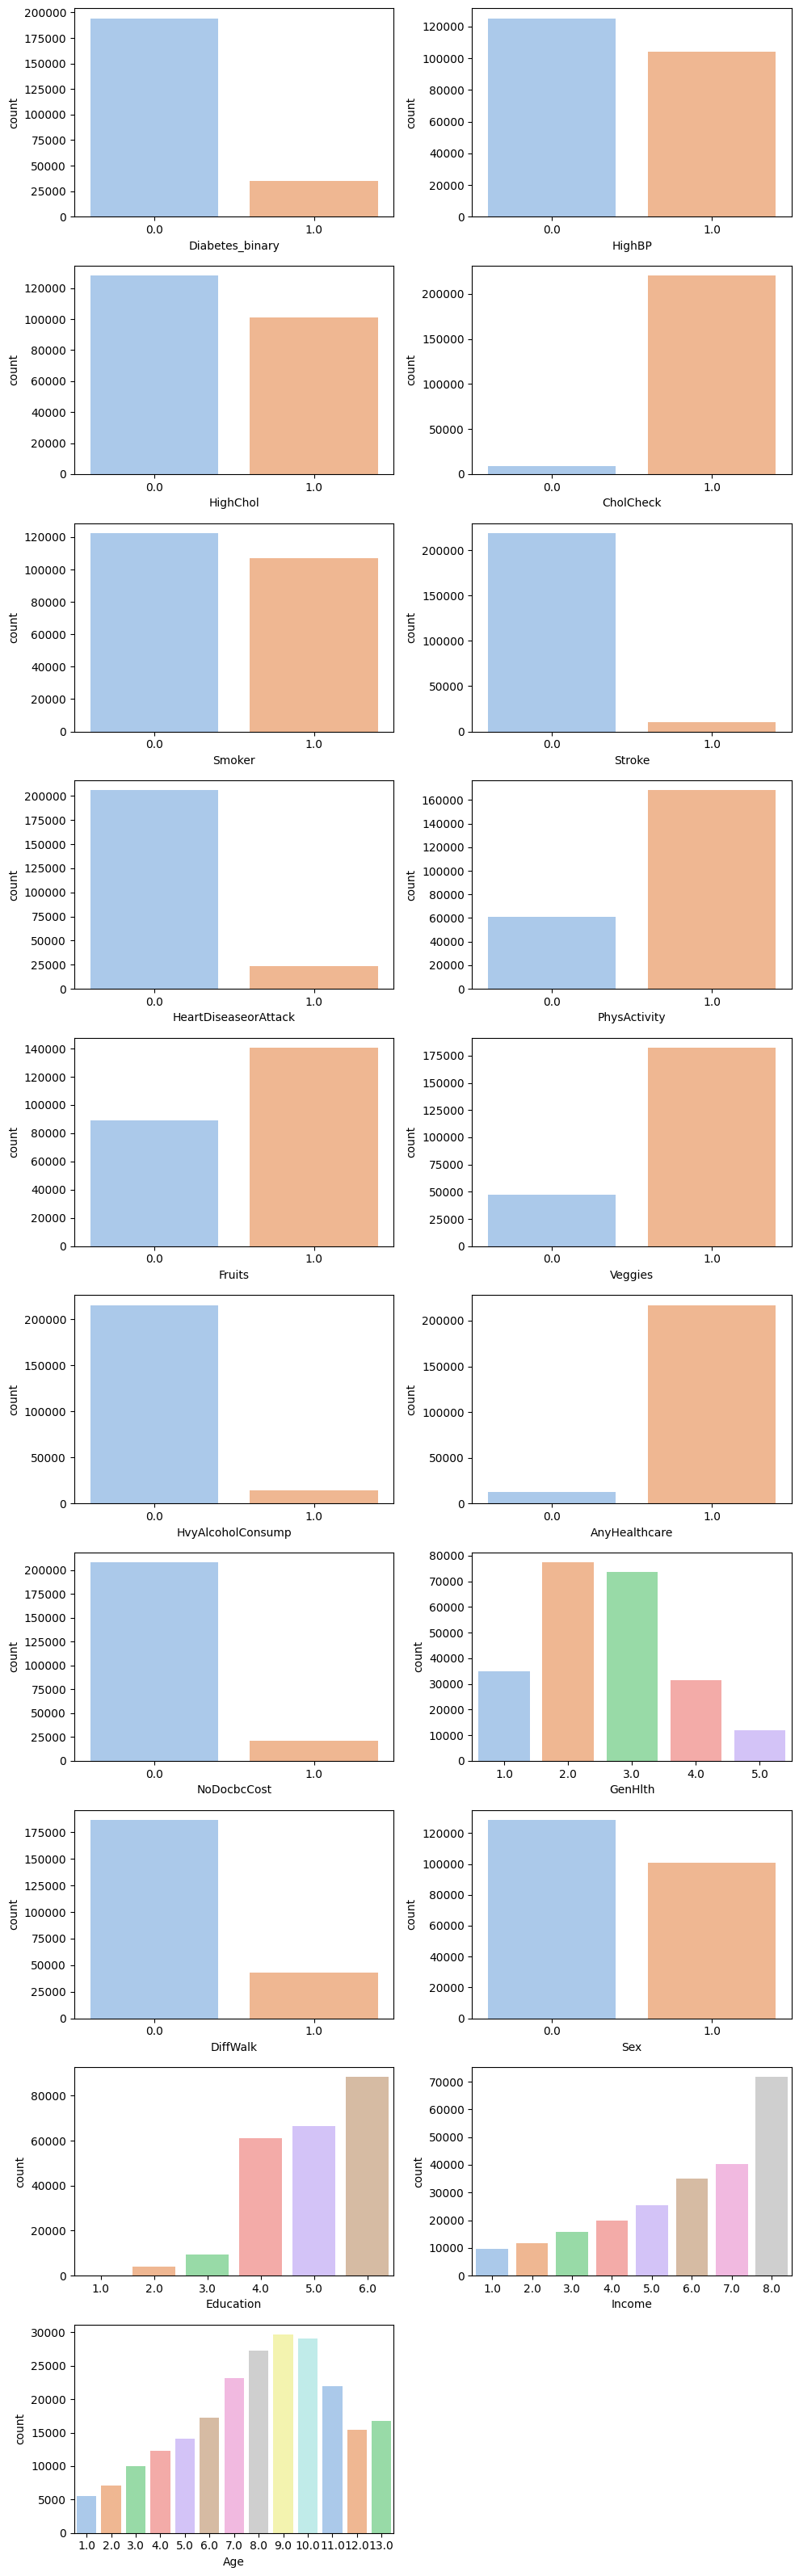

In [17]:
# Analysis of Categorical Variables
# ["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", 
# "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Education", "Income", "Age"]

# Graphic analysis
fig, axis = plt.subplots(10, 2, figsize = (10, 32))

sns.countplot(ax = axis[0, 0], data = df, x = "Diabetes_binary", palette='pastel', hue= "Diabetes_binary", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "HighBP", palette='pastel', hue= "HighBP", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "HighChol", palette='pastel', hue= "HighChol", legend=False)
sns.countplot(ax = axis[1, 1], data = df, x = "CholCheck", palette='pastel', hue= "CholCheck", legend=False)
sns.countplot(ax = axis[2, 0], data = df, x = "Smoker", palette='pastel', hue= "Smoker", legend=False)
sns.countplot(ax = axis[2, 1], data = df, x = "Stroke", palette='pastel', hue= "Stroke", legend=False)
sns.countplot(ax = axis[3, 0], data = df, x = "HeartDiseaseorAttack", palette='pastel', hue= "HeartDiseaseorAttack", legend=False)
sns.countplot(ax = axis[3, 1], data = df, x = "PhysActivity", palette='pastel', hue= "PhysActivity", legend=False)
sns.countplot(ax = axis[4, 0], data = df, x = "Fruits", palette='pastel', hue= "Fruits", legend=False)
sns.countplot(ax = axis[4, 1], data = df, x = "Veggies", palette='pastel', hue= "Veggies", legend=False)
sns.countplot(ax = axis[5, 0], data = df, x = "HvyAlcoholConsump", palette='pastel', hue= "HvyAlcoholConsump", legend=False)
sns.countplot(ax = axis[5, 1], data = df, x = "AnyHealthcare", palette='pastel', hue= "AnyHealthcare", legend=False)
sns.countplot(ax = axis[6, 0], data = df, x = "NoDocbcCost", palette='pastel', hue= "NoDocbcCost", legend=False)
sns.countplot(ax = axis[6, 1], data = df, x = "GenHlth", palette='pastel', hue= "GenHlth", legend=False)
sns.countplot(ax = axis[7, 0], data = df, x = "DiffWalk", palette='pastel', hue= "DiffWalk", legend=False)
sns.countplot(ax = axis[7, 1], data = df, x = "Sex", palette='pastel', hue= "Sex", legend=False)
sns.countplot(ax = axis[8, 0], data = df, x = "Education", palette='pastel', hue= "Education", legend=False)
sns.countplot(ax = axis[8, 1], data = df, x = "Income", palette='pastel', hue= "Income", legend=False)
sns.countplot(ax = axis[9, 0], data = df, x = "Age", palette='pastel', hue= "Age", legend=False)

# Delete axis
axis[9, 1].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [18]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


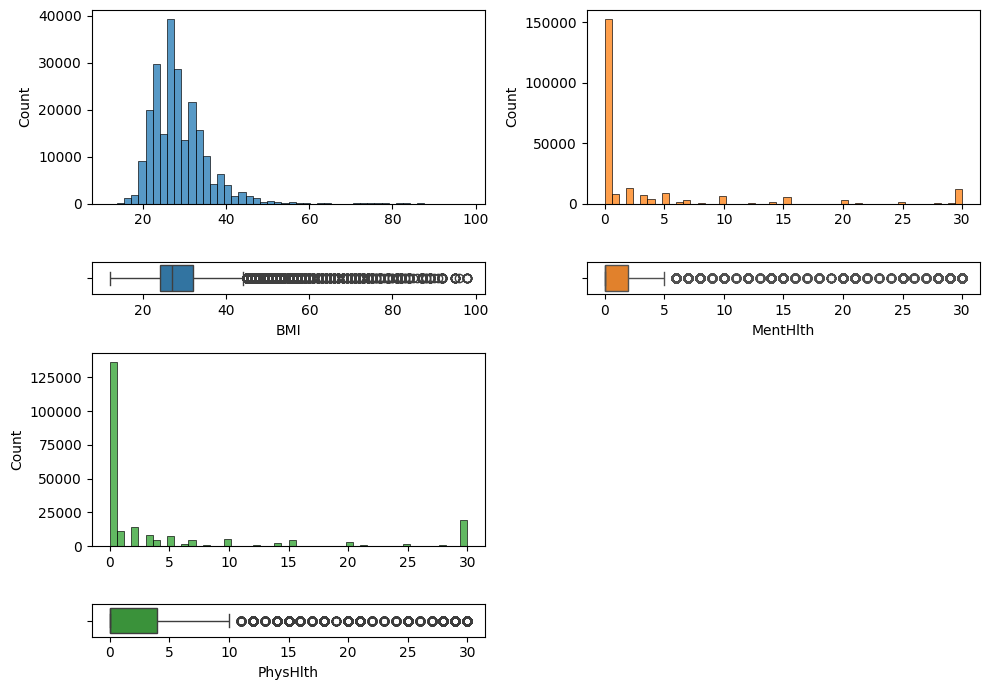

In [19]:
# Analysis of Numerical Variables
# ["BMI", "MentHlth", "PhysHlth", "Age"]
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Create a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "BMI", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "BMI", color="#1f77b4").set(xlabel = "BMI")

sns.histplot(ax = axis[0, 1], data = df, x = "MentHlth", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "MentHlth", color="#ff7f0e").set(xlabel = "MentHlth")

sns.histplot(ax = axis[2, 0], data = df, x = "PhysHlth", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "PhysHlth", color="#2ca02c").set(xlabel = "PhysHlth")

# Delete axis
axis[2, 1].axis("off")
axis[3, 1].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [20]:
# Interquartile range
bmi_info = df["BMI"].describe()
bmi_iqr = bmi_info["75%"] - bmi_info["25%"]
up_limit = bmi_info["75%"] + 1.5 * bmi_iqr
low_limit = bmi_info["25%"] - 1.5 * bmi_iqr

up_limit

np.float64(44.0)

In [21]:
# Interquartile range
menh_info = df["MentHlth"].describe()
menh_iqr = menh_info["75%"] - menh_info["25%"]
up_limit = menh_info["75%"] + 1.5 * menh_iqr
low_limit = menh_info["25%"] - 1.5 * menh_iqr

up_limit

np.float64(5.0)

In [22]:
# Interquartile range
physh_info = df["PhysHlth"].describe()
physh_iqr = physh_info["75%"] - physh_info["25%"]
up_limit = physh_info["75%"] + 1.5 * physh_iqr
low_limit = physh_info["25%"] - 1.5 * physh_iqr

up_limit

np.float64(10.0)

In [23]:
df[df["MentHlth"] > 5].shape[0]

36162

In [24]:
df.shape

(229474, 22)

In [25]:
(df[df["BMI"] > 44].shape[0] + df[df["MentHlth"] > 5].shape[0] + df[df["PhysHlth"] > 10].shape[0])/df.shape[0]

0.33182844243792325

In [26]:
df = df[df["BMI"] <= 44]

In [27]:
df.shape

(223836, 22)

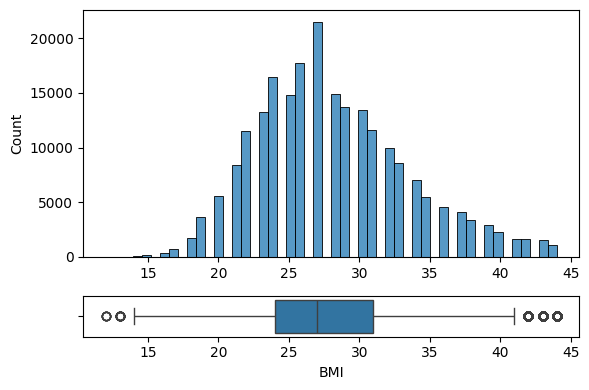

In [28]:
fig, axis = plt.subplots(2, 1, figsize = (6, 4), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0], data = df, x = "BMI", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "BMI", color="#1f77b4").set(xlabel = "BMI")
# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

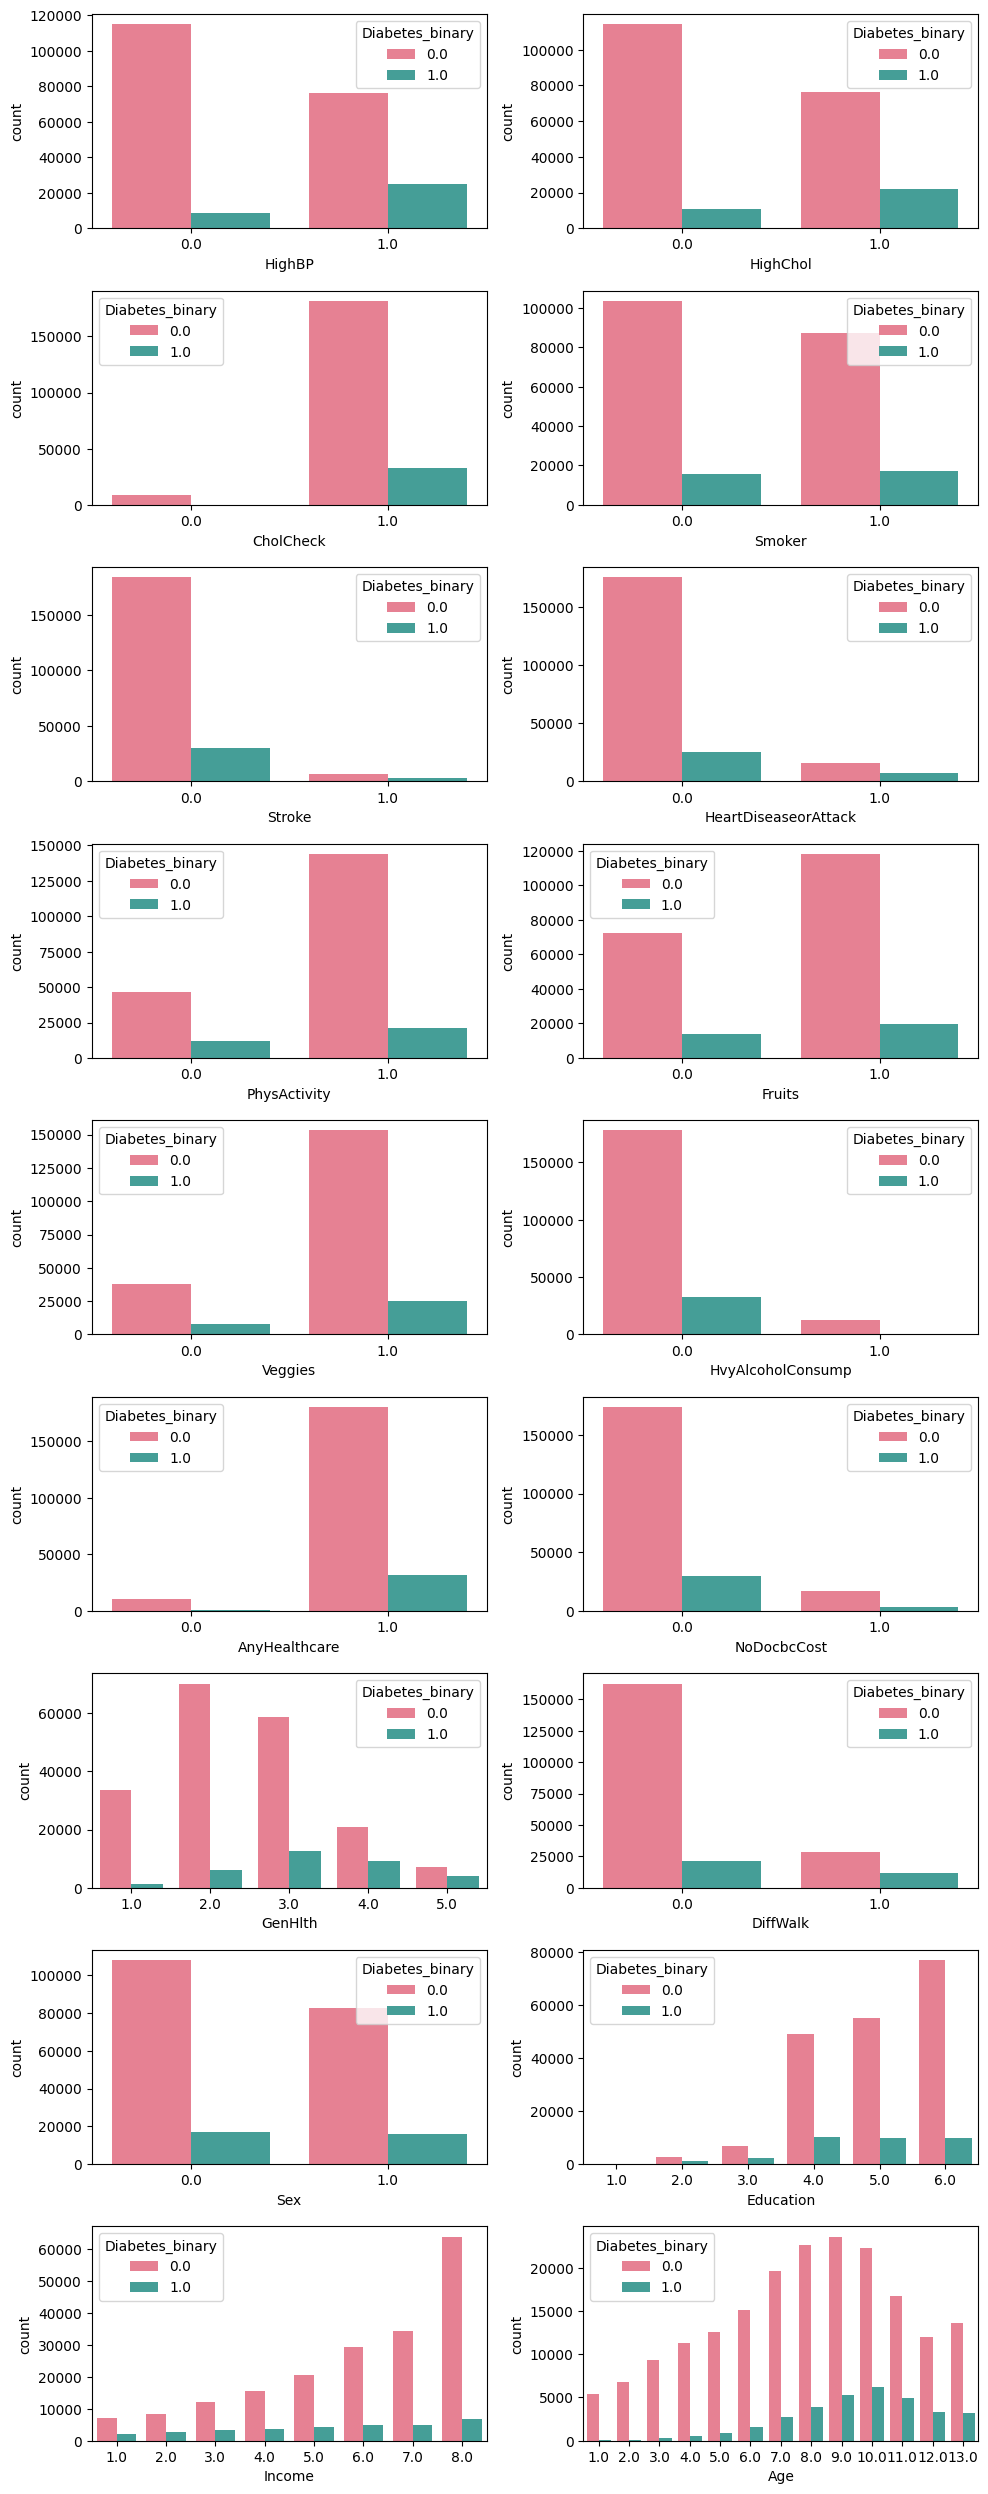

In [30]:
# Categorical - Categorical Analysis

fig, axis = plt.subplots(9, 2, figsize = (10, 25))

sns.countplot(ax = axis[0, 0], data = df, x = "HighBP", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[0, 1], data = df, x = "HighChol", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[1, 0], data = df, x = "CholCheck", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[1, 1], data = df, x = "Smoker", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[2, 0], data = df, x = "Stroke", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[2, 1], data = df, x = "HeartDiseaseorAttack", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[3, 0], data = df, x = "PhysActivity", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[3, 1], data = df, x = "Fruits", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[4, 0], data = df, x = "Veggies", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[4, 1], data = df, x = "HvyAlcoholConsump", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[5, 0], data = df, x = "AnyHealthcare", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[5, 1], data = df, x = "NoDocbcCost", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[6, 0], data = df, x = "GenHlth", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[6, 1], data = df, x = "DiffWalk", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[7, 0], data = df, x = "Sex", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[7, 1], data = df, x = "Education", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[8, 0], data = df, x = "Income", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[8, 1], data = df, x = "Age", palette='husl', hue= "Diabetes_binary", legend=True)


# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

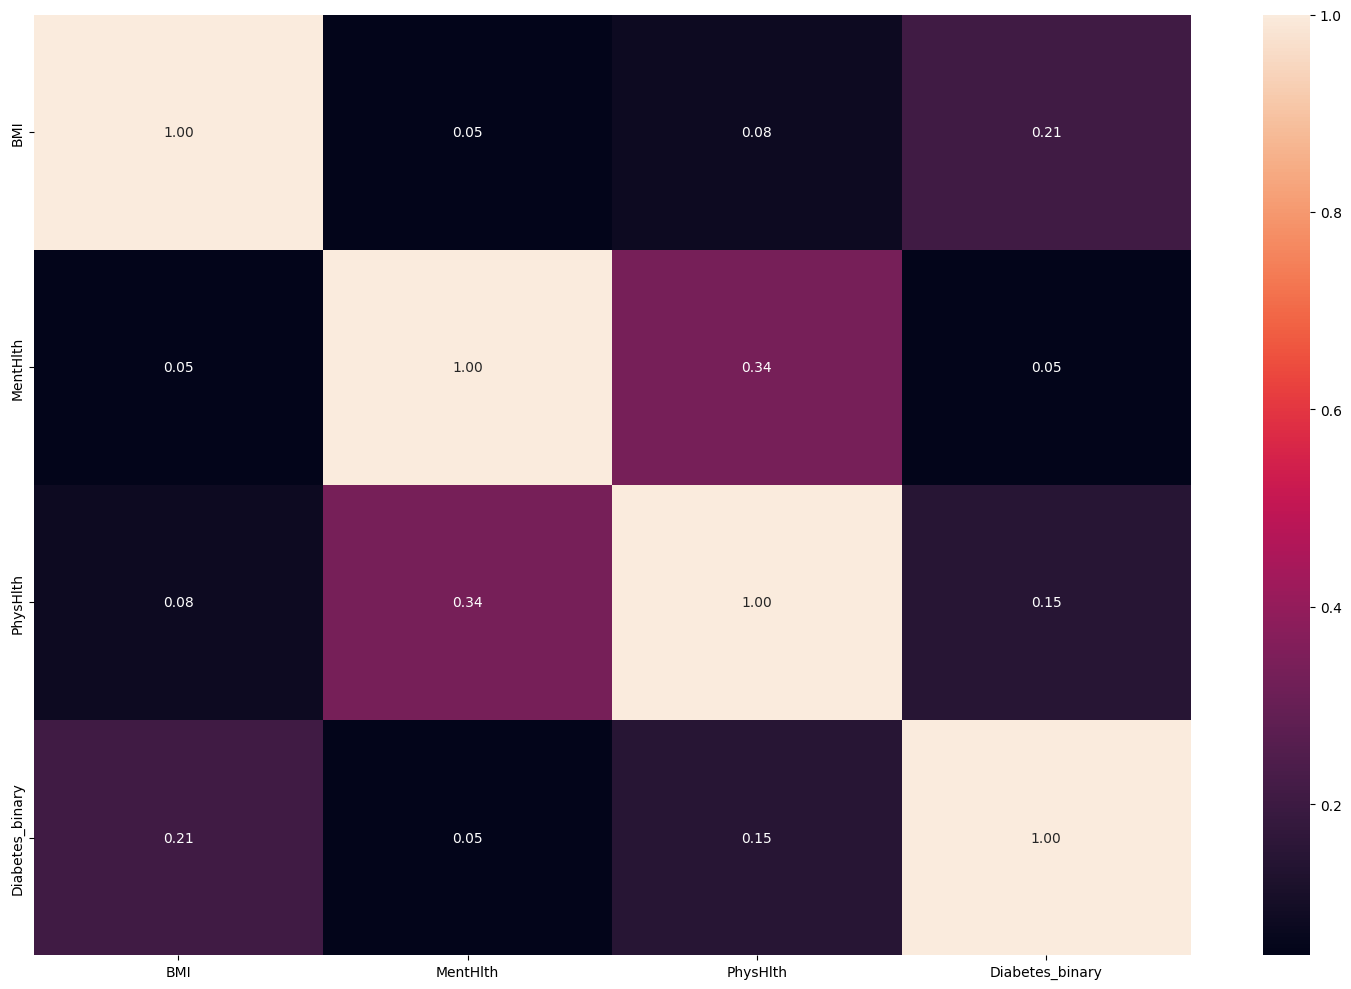

In [34]:
# Complete Numerical - Categorical Analysis

fig, axis = plt.subplots(figsize = (15, 10))

col_nums = ["BMI", "MentHlth", "PhysHlth", "Diabetes_binary"]

sns.heatmap(df[col_nums].corr(), annot = True, fmt = ".2f")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [35]:
df.isnull().sum().sort_values(ascending=False)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [43]:
# Data resampling
from sklearn.utils import resample

# Split the dataset into subsets based on labels
label_0 = df[df['Diabetes_binary'] == 0]
label_1 = df[df['Diabetes_binary'] == 1]

# Determine the maximum size to balance
max_size = max(len(label_0), len(label_1))

# Augmenting underrepresented labels with synthetic data
label_0_balanced = resample(label_0, replace=True, n_samples=max_size, random_state=42)
label_1_balanced = resample(label_1, replace=True, n_samples=max_size, random_state=42)

# Combining balanced datasets
df = pd.concat([label_0_balanced, label_1_balanced])

# Mix the rows to avoid any order
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balance
print(df['Diabetes_binary'].value_counts())



Diabetes_binary
1.0    190735
0.0    190735
Name: count, dtype: int64


In [44]:
# Splitting data into train and test sets
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [45]:
# # Scaling
# # Instantiate the scaler
# scaler = MinMaxScaler().fit(X_train)
# # Transformation and conversion to dataframe of scaled data
# X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
X_train_scaled = X_train
X_test_scaled = X_test

In [52]:
# ML Models
model = XGBClassifier(n_estimators=100, scale_pos_weight=6)
# Training
model.fit(X_train_scaled, y_train)
# Predict
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

Accuracy Test:  0.6755052821978137
F1 score Test:  0.7522491418735677
Precision Test:  0.6081026420955555
Recall Test:  0.9859653725078699
Accuracy Train:  0.6799912181822948
F1 score Train:  0.7554300053342149
Precision Train:  0.6113849546401615
Recall Train:  0.9882711397962193


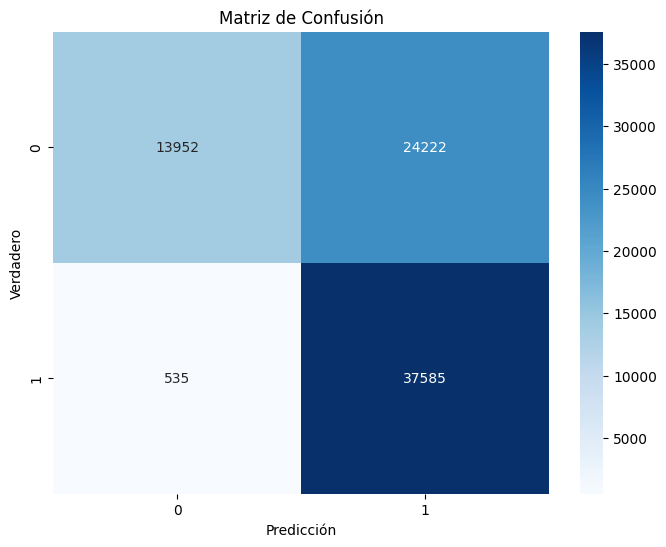

In [53]:
# Metrics
# Classification
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Graph the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árboles a entrenar (más árboles puede mejorar el resultado, pero también aumenta el tiempo)
    'max_depth': [3, 5, 7],                   # Profundidad máxima de cada árbol (más profundidad = más complejidad)
    'learning_rate': [0.01, 0.1, 0.2],        # Tasa de aprendizaje (cuánto se ajusta el modelo en cada paso)
    'subsample': [0.8, 1.0],                  # Porcentaje de datos usados para cada árbol (útil para evitar overfitting)
    'colsample_bytree': [0.8, 1.0],           # Porcentaje de columnas usadas para cada árbol
    'gamma': [0, 1, 5],                       # Reducción mínima de pérdida necesaria para dividir un nodo (más alto = modelo más conservador)
    'reg_alpha': [0, 0.5, 1],                 # Regularización L1 (puede ayudar a eliminar características irrelevantes)
    'reg_lambda': [1, 1.5, 2]                 # Regularización L2 (reduce la magnitud de los coeficientes para evitar overfitting)
}

xgb = XGBClassifier(
    eval_metric='logloss',       # Métrica para evaluar durante el entrenamiento (no afecta el GridSearch)
    random_state=42              # Semilla fija para resultados reproducibles
    )

grid_search = GridSearchCV(
    estimator=xgb,               # Modelo que se va a optimizar
    param_grid=param_grid,       # Diccionario con los hiperparámetros a probar
    scoring='f1',                # Métrica de evaluación (usamos F1 ya que el dataset está balanceado)
    cv=3,                        # Validación cruzada con 3 particiones
    verbose=1,                   # Muestra el progreso durante la búsqueda
    n_jobs=-1                    # Usa todos los núcleos disponibles para acelerar el proceso
)

grid_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


KeyboardInterrupt: 